In [1]:
print("""
@File         : ch01.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-03-11 21:25:05
@Email        : cuixuanstephen@gmail.com
@Description  : 
""")


@File         : ch01.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-03-11 21:25:05
@Email        : cuixuanstephen@gmail.com
@Description  : 



In [3]:
import random
from math import exp, sqrt

In [5]:
S0 = 100
r = 0.05
T = 1.0
sigma = 0.2
values = []

In [12]:
%%time
for _ in range(1_000_000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) *sqrt(T))
    values.append(ST)

CPU times: total: 609 ms
Wall time: 1.19 s


In [10]:
values = [0] * 1_000_000

In [11]:
%%time
for idx in range(1_000_000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) *sqrt(T))
    values[idx] = ST

CPU times: total: 719 ms
Wall time: 1.33 s


In [13]:
import numpy as np

In [19]:
%%time
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(1_000_000) * np.sqrt(T))

CPU times: total: 46.9 ms
Wall time: 112 ms


In [25]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
import configparser
c = configparser.ConfigParser()
c.read('../../token/pyalgo.cfg')

['../../token/pyalgo.cfg']

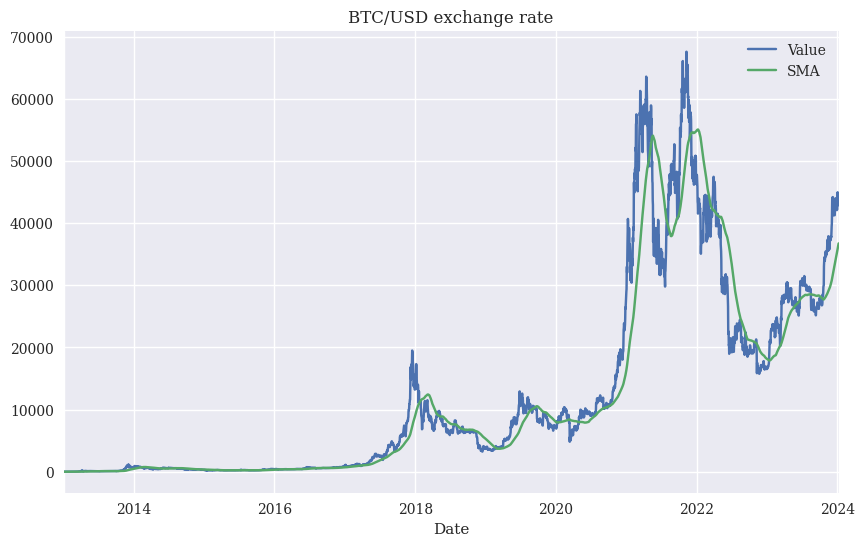

In [38]:
import quandl as q
import pandas as pd
q.ApiConfig.api_key = c['quandl']['api_key']
# d = q.get('BCHAIN/MKPRU')
d = pd.read_csv('../data/BCHAIN_MKPRU.csv', parse_dates=True, index_col='Date')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate', figsize=(10, 6))
plt.show()

In [40]:
d

,Value,SMA
Date,,
2009-01-02,0.00,NaN
2009-01-03,0.00,NaN
2009-01-04,0.00,NaN
2009-01-05,0.00,NaN
2009-01-06,0.00,NaN
...,...,...
2024-01-04,42854.95,36033.3035
2024-01-05,44190.10,36213.0763
2024-01-06,44181.10,36391.3108
